Kunskapskontroll 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


Preparing and fetching dataset

In [2]:
mnist = fetch_openml('mnist_784', version = 1, cache = True, as_frame = False)

print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

EDA

In [9]:
print(f"Dataset Shape: {X.shape}, Labels Shape: {y.shape}")

Dataset Shape: (70000, 784), Labels Shape: (70000,)


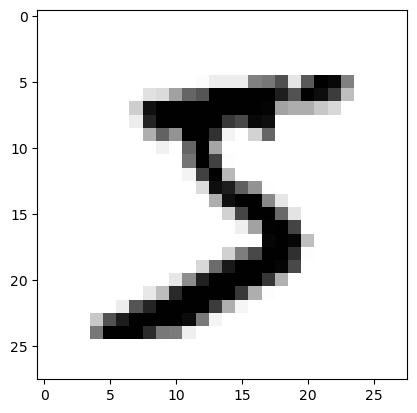

In [10]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=plt.get_cmap("binary"))

In [4]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42) 

In [5]:
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
log_reg = LogisticRegression(max_iter=2000, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [7]:
random_forest_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [8]:
y_pred_rf = random_forest_clf.predict(X_val)
y_pred_dt = dt_clf.predict(X_val)
y_pred_lr = log_reg.predict(X_val_scaled)

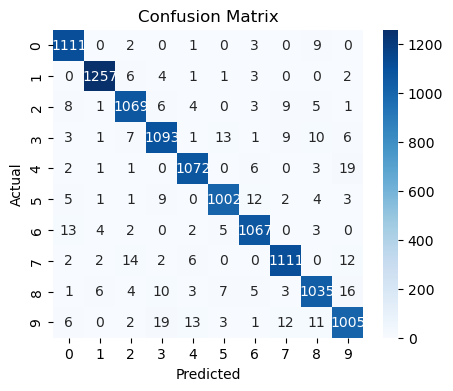

In [9]:
conf_matrix = confusion_matrix(y_val, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

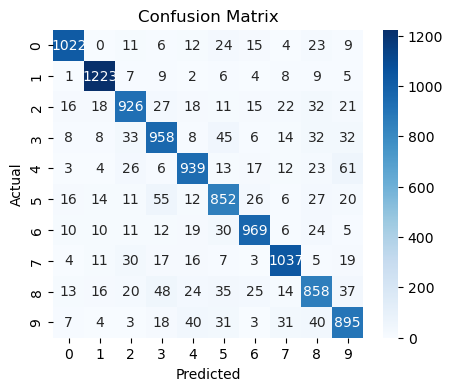

In [10]:
conf_matrix = confusion_matrix(y_val, y_pred_dt)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

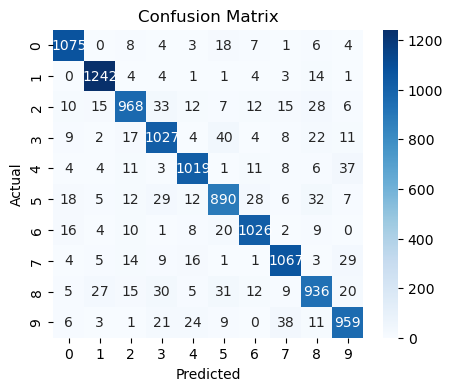

In [11]:
conf_matrix = confusion_matrix(y_val, y_pred_lr)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
accuracy = accuracy_score(y_val, y_pred_rf)
print(f'Accuracy: {accuracy:.4f}')

accuracy = accuracy_score(y_val, y_pred_dt)
print(f'Accuracy: {accuracy:.4f}')

accuracy = accuracy_score(y_val, y_pred_lr)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9663
Accuracy: 0.8642
Accuracy: 0.9115


In [ ]:
print(classification_report(y_val, y_pred_rf))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1126
           1       0.99      0.99      0.99      1274
           2       0.96      0.97      0.97      1106
           3       0.96      0.96      0.96      1144
           4       0.97      0.97      0.97      1104
           5       0.97      0.96      0.97      1039
           6       0.97      0.97      0.97      1096
           7       0.97      0.97      0.97      1149
           8       0.96      0.95      0.95      1090
           9       0.94      0.94      0.94      1072

    accuracy                           0.97     11200
   macro avg       0.97      0.97      0.97     11200
weighted avg       0.97      0.97      0.97     11200

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1126
           1       0.94      0.96      0.95      1274
           2       0.86      0.84      0.85      1106
           3       0.83 

In [15]:
print(classification_report(y_val, y_pred_dt))


              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1126
           1       0.94      0.96      0.95      1274
           2       0.86      0.84      0.85      1106
           3       0.83      0.84      0.83      1144
           4       0.86      0.85      0.86      1104
           5       0.81      0.82      0.81      1039
           6       0.89      0.88      0.89      1096
           7       0.90      0.90      0.90      1149
           8       0.80      0.79      0.79      1090
           9       0.81      0.83      0.82      1072

    accuracy                           0.86     11200
   macro avg       0.86      0.86      0.86     11200
weighted avg       0.86      0.86      0.86     11200



In [14]:
print(classification_report(y_val, y_pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1126
           1       0.95      0.97      0.96      1274
           2       0.91      0.88      0.89      1106
           3       0.88      0.90      0.89      1144
           4       0.92      0.92      0.92      1104
           5       0.87      0.86      0.87      1039
           6       0.93      0.94      0.93      1096
           7       0.92      0.93      0.93      1149
           8       0.88      0.86      0.87      1090
           9       0.89      0.89      0.89      1072

    accuracy                           0.91     11200
   macro avg       0.91      0.91      0.91     11200
weighted avg       0.91      0.91      0.91     11200

